In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns; sns.set()
import utils
import numpy as np
from subprocess import call
from subprocess import call, check_output

plt.rcParams['figure.figsize'] = (10, 6)

In [45]:
X = [1,3,4, 5,7,11,30, 41]
alpha = sorted([i for i in range(1, 30, 4)] + [3,7, 40,50,100])
for a in alpha:
    for k in X:
        print(a,k)
        call(['../src/main', '-m', '3', '-i', '../tests/catedra/testFullBig.in', '-o', '../tests/exp2bis/resulta{}k{}'.format(a,k), '-knn-k', str(k), '-alpha', str(a), '-k-folds', str(5)])

1 1
1 3
1 4
1 5
1 7
1 11
1 30
1 41
3 1
3 3
3 4
3 5
3 7
3 11
3 30
3 41
5 1
5 3
5 4
5 5
5 7
5 11
5 30
5 41
7 1
7 3
7 4
7 5
7 7
7 11
7 30
7 41
9 1
9 3
9 4
9 5
9 7
9 11
9 30
9 41
13 1
13 3
13 4
13 5
13 7
13 11
13 30
13 41
17 1
17 3
17 4
17 5
17 7
17 11
17 30
17 41
21 1
21 3
21 4
21 5
21 7
21 11
21 30
21 41
25 1
25 3
25 4
25 5
25 7
25 11
25 30
25 41
29 1
29 3
29 4
29 5
29 7
29 11
29 30
29 41
40 1
40 3
40 4
40 5
40 7
40 11
40 30
40 41
50 1
50 3
50 4
50 5
50 7
50 11
50 30
50 41
100 1
100 3
100 4
100 5
100 7
100 11
100 30
100 41


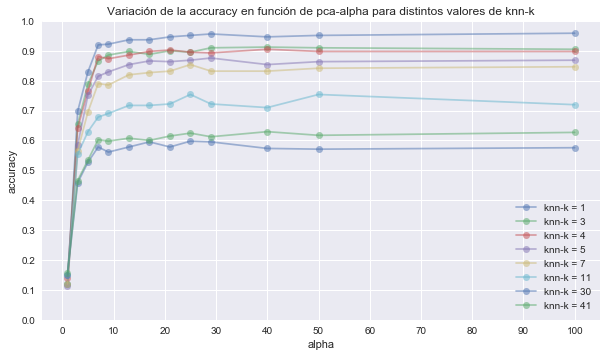

In [44]:
X = [1,3,4, 5,7,11,30, 41]
alpha = sorted([i for i in range(1, 30, 4)] + [3,7, 40,50,100])
fig = plt.gcf()
fig.set_size_inches(10, 5.5)
for k in X:
    plt.plot(alpha, [np.average(utils.loadStats('../tests/exp2bis/resulta{}k{}'.format(a,k))['acccuracy']) for a in alpha], marker='o', label='knn-k = {}'.format(k), alpha=0.5)
plt.ylim(0,1)
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks(range(0,101,10))
plt.yticks(np.arange(0,1.001,0.1))
plt.title('Variación de la accuracy en función de pca-alpha para distintos valores de knn-k')
plt.savefig('acc-varia-k-alpha.png')
plt.show()

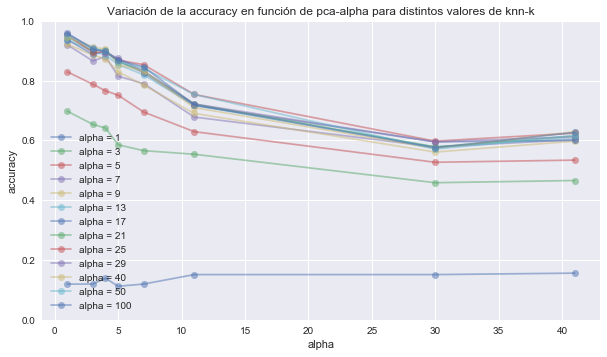

In [16]:
X = [1,3,4, 5,7,11,30, 41]
alpha = sorted([i for i in range(1, 30, 4)] + [3,7, 40,50,100])
fig = plt.gcf()
fig.set_size_inches(10, 5.5)
for a in alpha:
    plt.plot(X, [np.average(utils.loadStats('../tests/exp2bis/resulta{}k{}'.format(a,k))['acccuracy']) for k in X], marker='o', label='alpha = {}'.format(a), alpha=0.5)
plt.ylim(0,1)
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('accuracy')
# plt.xticks(range(0,101,10))
plt.title('Variación de la accuracy en función de pca-alpha para distintos valores de knn-k')
plt.show()

In [46]:
[(k,np.average(utils.loadStats('../tests/exp2bis/resulta{}k{}'.format(17,k))['acccuracy'])) for k in X]

[(1, 0.9365854),
 (3, 0.8878048),
 (4, 0.8975612),
 (5, 0.8658538),
 (7, 0.8268291999999999),
 (11, 0.7170732),
 (30, 0.595122),
 (41, 0.6)]

In [35]:
def getPrecisionReCall(a,k):
    matrices = utils.generateConfM('../tests/exp2bis/resulta{}k{}.conf'.format(a,k))
    sumprecision = 0 
    sumrecall = 0 
    cant = 0
    for matriz in matrices:
        for posclass in range(41):
            sumprecision += matriz.precision(positive_class=posclass)
            sumrecall += matriz.recall(positive_class=posclass)
            cant += 1
    return (sumprecision/cant, sumrecall/cant)

precision = {}
recall = {}
precisiondf = pd.DataFrame(columns=alpha, index=X)
recalldf = pd.DataFrame(columns=alpha, index=X)
for k in X:
    for a in alpha:
        res = getPrecisionReCall(a,k)
        precision[(a,k)] =  res[0]
        recall[(a,k)] = res[1] 
        precisiondf.loc[k,a] = res[0]
        recalldf.loc[k,a] = res[1]

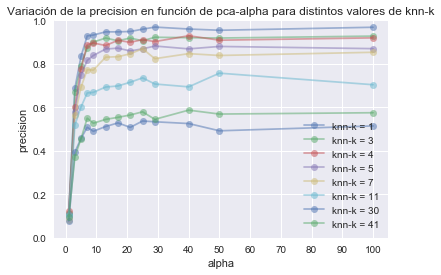

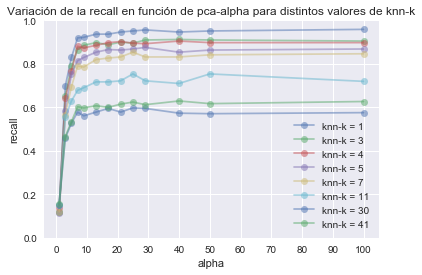

In [40]:
for k in X:
    plt.plot(alpha, [precision[(a,k)] for a in alpha], marker='o', label='knn-k = {}'.format(k), alpha=0.5)
plt.ylim(0,1)
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('precision')
plt.xticks(range(0,101,10))
plt.title('Variación de la precision en función de pca-alpha para distintos valores de knn-k')
plt.show()

for k in X:
    plt.plot(alpha, [recall[(a,k)] for a in alpha], marker='o', label='knn-k = {}'.format(k), alpha=0.5)
plt.ylim(0,1)
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('recall')
plt.xticks(range(0,101,10))
plt.title('Variación de la recall en función de pca-alpha para distintos valores de knn-k')
plt.show()

In [36]:
precisiondf

,1,3,5,7,9,13,17,21,25,29,40,50,100
1,0.11122,0.688374,0.835122,0.928455,0.93252,0.947154,0.947154,0.94878,0.95935,0.969106,0.960163,0.954472,0.968293
3,0.112648,0.66878,0.791707,0.873984,0.900325,0.918699,0.906016,0.918699,0.906016,0.922276,0.920325,0.918699,0.927642
4,0.125366,0.601475,0.77813,0.888455,0.895772,0.88439,0.90813,0.899024,0.911382,0.902358,0.929268,0.90878,0.919512
5,0.0956098,0.580569,0.747967,0.815772,0.838618,0.86813,0.872195,0.859187,0.869106,0.881951,0.868862,0.88,0.869919
7,0.0800271,0.563252,0.693577,0.773171,0.771138,0.830732,0.832846,0.846341,0.869431,0.82374,0.846922,0.838537,0.853171
11,0.105621,0.518537,0.602044,0.666039,0.668862,0.693415,0.698374,0.715447,0.73554,0.707317,0.694239,0.757154,0.703984
30,0.0775165,0.394654,0.457294,0.508304,0.489766,0.511847,0.528374,0.507782,0.537166,0.533589,0.525459,0.492094,0.514394
41,0.0971854,0.372613,0.456365,0.550105,0.526852,0.54465,0.553995,0.564832,0.579319,0.544882,0.587096,0.56911,0.575196


In [38]:
recalldf

,1,3,5,7,9,13,17,21,25,29,40,50,100
1,0.119512,0.697561,0.829268,0.919512,0.921951,0.936585,0.936585,0.946341,0.95122,0.956098,0.946341,0.95122,0.958537
3,0.119512,0.653659,0.787805,0.865854,0.885366,0.897561,0.887805,0.9,0.895122,0.909756,0.912195,0.909756,0.904878
4,0.139024,0.641463,0.765854,0.880488,0.873171,0.885366,0.897561,0.902439,0.895122,0.892683,0.904878,0.897561,0.897561
5,0.112195,0.585366,0.75122,0.814634,0.829268,0.853659,0.865854,0.863415,0.868293,0.87561,0.853659,0.863415,0.868293
7,0.119512,0.565854,0.695122,0.790244,0.785366,0.819512,0.826829,0.831707,0.853659,0.831707,0.831707,0.841463,0.846341
11,0.15122,0.553659,0.629268,0.678049,0.690244,0.717073,0.717073,0.721951,0.753659,0.721951,0.709756,0.753659,0.719512
30,0.15122,0.458537,0.526829,0.578049,0.560976,0.578049,0.595122,0.578049,0.597561,0.595122,0.573171,0.570732,0.57561
41,0.156098,0.465854,0.534146,0.602439,0.597561,0.607317,0.6,0.614634,0.62439,0.612195,0.629268,0.617073,0.626829


In [39]:
precisiondf -recalldf

,1,3,5,7,9,13,17,21,25,29,40,50,100
1,-0.00829268,-0.00918699,0.00585366,0.00894309,0.0105691,0.0105691,0.0105691,0.00243902,0.00813008,0.0130081,0.0138211,0.00325203,0.0097561
3,-0.00686411,0.015122,0.00390244,0.00813008,0.0149593,0.0211382,0.0182114,0.0186992,0.0108943,0.0125203,0.00813008,0.00894309,0.0227642
4,-0.0136585,-0.0399884,0.0122764,0.00796748,0.0226016,-0.00097561,0.0105691,-0.00341463,0.0162602,0.0096748,0.0243902,0.0112195,0.0219512
5,-0.0165854,-0.00479675,-0.00325203,0.00113821,0.00934959,0.0144715,0.00634146,-0.00422764,0.000813008,0.00634146,0.0152033,0.0165854,0.00162602
7,-0.0394851,-0.00260163,-0.00154472,-0.0170732,-0.0142276,0.0112195,0.00601626,0.0146341,0.0157724,-0.00796748,0.0152149,-0.00292683,0.00682927
11,-0.0455981,-0.035122,-0.0272242,-0.0120093,-0.0213821,-0.0236585,-0.0186992,-0.00650407,-0.0181185,-0.0146341,-0.0155168,0.00349593,-0.0155285
30,-0.0737031,-0.0638831,-0.0695354,-0.0697445,-0.0712098,-0.0662021,-0.066748,-0.0702671,-0.0603949,-0.0615331,-0.047712,-0.0786372,-0.0612153
41,-0.0589121,-0.0932404,-0.0777816,-0.0523345,-0.0707085,-0.0626674,-0.0460046,-0.0498026,-0.0450716,-0.0673128,-0.0421719,-0.0479636,-0.0516334


In [37]:
DIR_PATH = '../tests/exp2/'
EXPECTED_PATH = '../tests/nuestros/ImagenesCaras80.expected'
X = [i for i in range(1,31)] #+ [i for i in range(51,272, 20)] + [i for i in range(277,400, 35)]
alpha = [i for i in range(1, 50, 4)]

In [38]:
expected = pd.read_csv(EXPECTED_PATH, header=None)[0]
tags = expected


# Midiendo tiempos

In [17]:
rango_ks = [1,3, 5,11,30, 41]
rango_alpha = sorted([i for i in range(1, 30, 4)] + [3,7, 40,50,100])

In [101]:
tiempospca = []
tiempospred = []


for k in rango_ks:
    print(k)
    tiemposkpca = []
    tiemposkpredict= []
    for a in rango_alpha:
        print("a ", a )
        result = check_output(['../src/experimentotiempos', '-m', str(1), '-i', '../tests/nuestros/ImagenesCaras80.train','-q','../tests/nuestros/ImagenesCaras80.test', '-o', '/dev/null', '-knn-k', str(k), '-alpha', str(a)])
        valpca = float(result.decode('utf-8').split(',')[0])
        valpred = float(result.decode('utf-8').split(',')[1])
        tiemposkpca.append(valpca)
        tiemposkpredict.append(valpred)
    tiempospca.append(tiemposkpca)
    tiempospred.append(tiemposkpredict)
df= pd.DataFrame(tiempospred, columns=rango_alpha, index=rango_ks)
df.to_pickle('tiemposvalpha.pk')

1
a  1
a  3
a  5
a  7
a  9
a  13
a  17
a  21
a  25
a  29
a  40
a  50
a  100
3
a  1
a  3
a  5
a  7
a  9
a  13
a  17
a  21
a  25
a  29
a  40
a  50
a  100
5
a  1
a  3
a  5
a  7
a  9
a  13
a  17
a  21
a  25
a  29
a  40
a  50
a  100
11
a  1
a  3
a  5
a  7
a  9
a  13
a  17
a  21
a  25
a  29
a  40
a  50
a  100
30
a  1
a  3
a  5
a  7
a  9
a  13
a  17
a  21
a  25
a  29
a  40
a  50
a  100
41
a  1
a  3
a  5
a  7
a  9
a  13
a  17
a  21
a  25
a  29
a  40
a  50
a  100


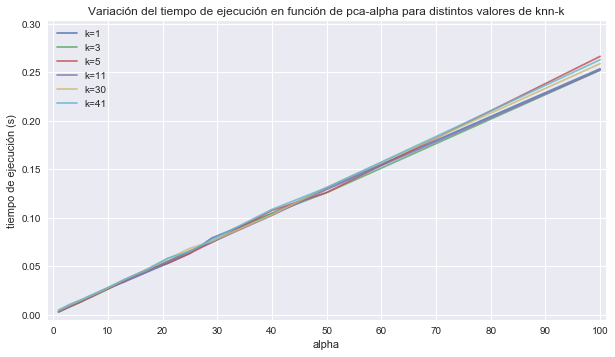

In [42]:
df = pd.read_pickle('tiemposvalpha.pk')
# display(df)

for k in df.index:
    plt.plot(rango_alpha, df.loc[k], alpha=0.8, label='k={}'.format(k))
# plt.plot(x, eval('0.004057+0.0025312323232323237*x'), label="funcion")
plt.legend(loc='best')
fig = plt.gcf()
fig.set_size_inches(10, 5.5)
plt.xlabel('alpha')
plt.ylabel('tiempo de ejecución (s)')
plt.xlim(-1,101)
plt.xticks(range(0,101,10))
plt.ylim(-0.005,0.303)
plt.title('Variación del tiempo de ejecución en función de pca-alpha para distintos valores de knn-k')
plt.savefig('tiempo-varia-k-alpha.png')
plt.show()

In [19]:
print(df.index)
df.loc[41]

Int64Index([1, 3, 5, 11, 30, 41], dtype='int64')


1      0.004992
3      0.010811
5      0.015388
7      0.020570
9      0.025475
13     0.036392
17     0.046607
21     0.058561
25     0.065438
29     0.077497
40     0.108690
50     0.131076
100    0.262936
Name: 41, dtype: float64

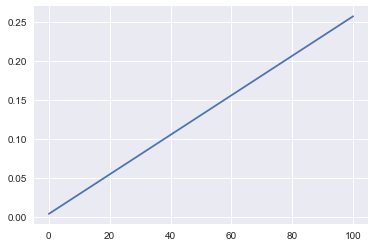

In [10]:
(0.253649-0.003057)/99
x=np.array(range(101))
plt.plot(x, eval('0.004057+0.0025312323232323237*x'))
plt.show()